In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv(r'C:\Users\perma\Documents\GitHub\houseprice\train.csv',index_col=0)
test = pd.read_csv(r'C:\Users\perma\Documents\GitHub\houseprice\test.csv',index_col=0)

In [3]:
#quick peek over top five records
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#check the number of features and samples
print("The train data size feature is : {} ".format(train.shape))
print("The test data size  feature is : {} ".format(test.shape))

The train data size feature is : (1460, 80) 
The test data size  feature is : (1459, 79) 


#GrLivArea_Outliers

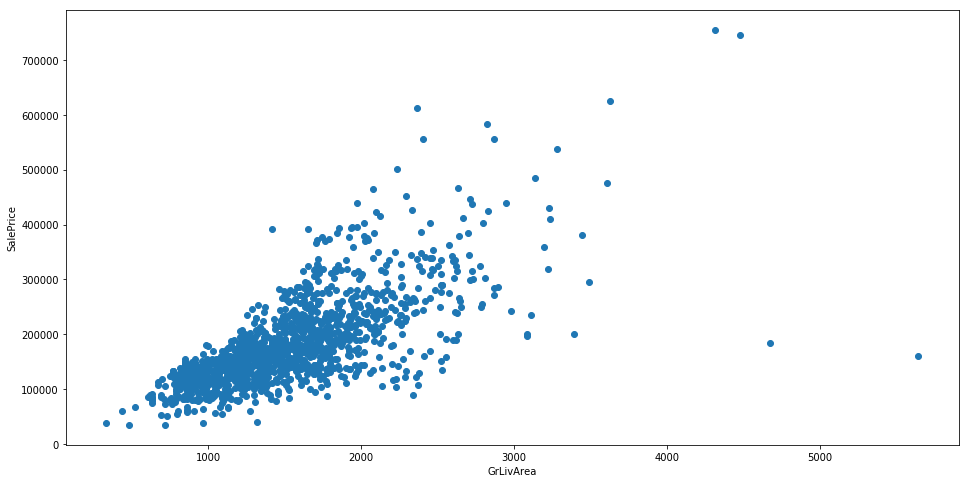

In [5]:
f=plt.figure(figsize=(16,8))
ax=f.add_subplot(111)
ax.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [6]:
#get index of outliers
huge_GrLivArea_outliers_index=train[np.logical_and(train['GrLivArea']>4000,train['SalePrice']<300000)].index
high_SalePrice_GrLivArea_outliers_index=train[np.logical_and(train['GrLivArea']>4000,train['SalePrice']>700000)].index

In [7]:
#outliers with huge GrLivArea but low SalePrice
#we inspect some of other features to decide whether it is abnormal
outliers1=train.loc[huge_GrLivArea_outliers_index,['MSZoning','SalePrice','OverallCond','GrLivArea']]
outliers1

,MSZoning,SalePrice,OverallCond,GrLivArea
Id,,,,
524,RL,184750,5,4676
1299,RL,160000,5,5642


In [8]:
#outliers with huge GrLivArea but extremely high SalePrice
#we inspect some of other features to decide whether it is abnormal
outliers2=train.loc[high_SalePrice_GrLivArea_outliers_index,['MSZoning','SalePrice','OverallCond','GrLivArea']]
outliers2

,MSZoning,SalePrice,OverallCond,GrLivArea
Id,,,,
692,RL,755000,6,4316
1183,RL,745000,5,4476


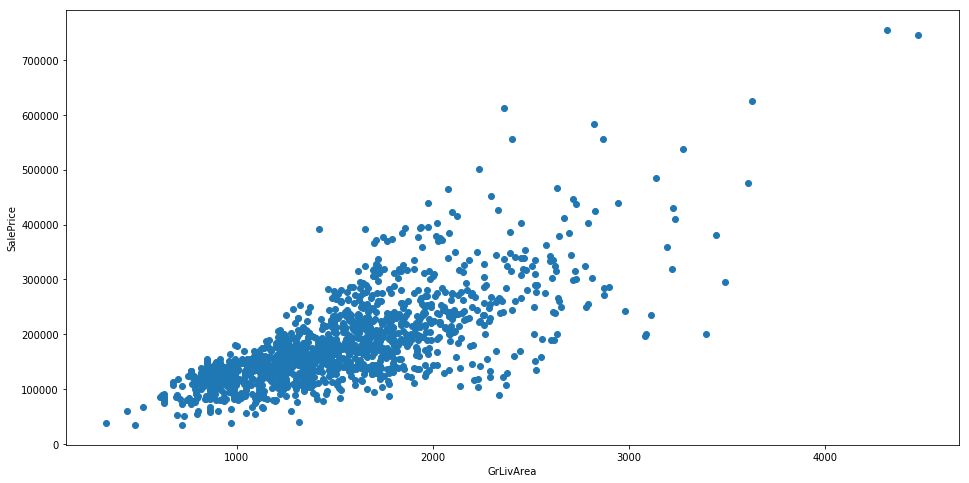

In [9]:
#we'll drop outliers1 and keep outliers2 as normal data
train.drop(huge_GrLivArea_outliers_index,inplace=True)
f=plt.figure(figsize=(16,8))
ax=f.add_subplot(111)
ax.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()
#finally we truely drop them off,and GrLivArea_SalePrice shows linearilty

D:\software\anaconda\exe\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mu=180932.92,sigma=79467.79


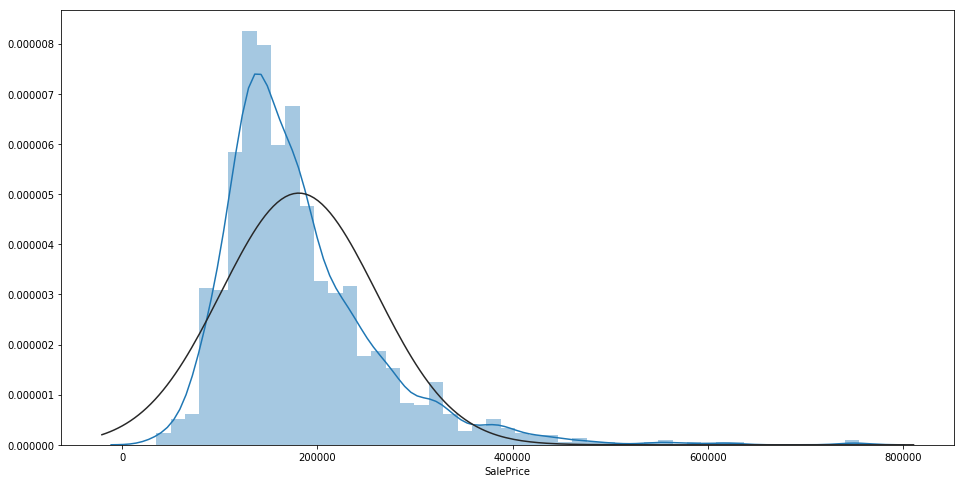

In [10]:
#target variable analyse
from scipy.stats import norm
f=plt.figure(figsize=(16,8))
ax=f.add_subplot(111)
sns.distplot(train["SalePrice"],fit=norm,ax=ax)
(mu,sigma)=norm.fit(train['SalePrice'])
print('mu={0:.2f},sigma={1:.2f}'.format(mu,sigma))

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

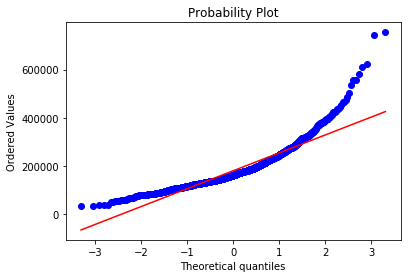

In [11]:
f1=plt.figure()
ax1=f1.add_subplot(111)
stats.probplot(train['SalePrice'],plot=plt)

D:\software\anaconda\exe\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 12.02 and sigma = 0.40



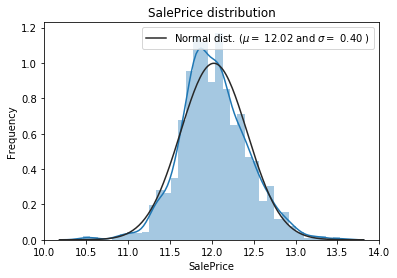

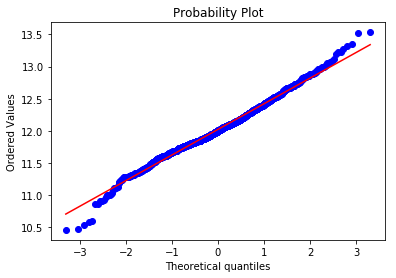

In [12]:
#we can draw the conlusion that the distribution is skewed and peaked
#we can do np.log on SalePrice to approximate it to norm dist
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# feature engineering

In [13]:
num_train=train.shape[0]
num_test=test.shape[0]
target=train.SalePrice.values
train.pop('SalePrice')
#why we reset index here because we dropped some outliers in previous section ,thus the index (ID) is not consecutive 
all_data=pd.concat((train,test)).reset_index(drop=True)
print('all_data size is :{}'.format(all_data.shape))

all_data size is :(2917, 79)


# missing data handling

In [14]:
missing_data=all_data.isnull().sum().sort_values(ascending=False)
missing_data=missing_data[missing_data>0]
missing_ratio=pd.DataFrame({'missing_ratio':missing_data/all_data.shape[0]})
missing_ratio

,missing_ratio
PoolQC,0.996915
MiscFeature,0.964004
Alley,0.932122
Fence,0.804251
FireplaceQu,0.486802
LotFrontage,0.166610
GarageCond,0.054508
GarageQual,0.054508
GarageYrBlt,0.054508
GarageFinish,0.054508


In [15]:
#PoolQC
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

# MiscFeature
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

#Alley

all_data["Alley"] = all_data["Alley"].fillna("None")

#Fence
all_data["Fence"] = all_data["Fence"].fillna("None")

#FireplaceQu 
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to
#other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
all_data["LotFrontage"] = all_data.groupby("Neighborhood")['LotFrontage'].apply(lambda x:x.fillna(x.median()))

#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features,
#NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, 
#this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)

#Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

#MSSubClass : Na most likely means No building class. We can replace missing values with Non
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

## transform some numerical features that are really categorical featrue

In [16]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [19]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl=LabelEncoder()
    all_data[c]=lbl.fit_transform(all_data[c].values)
print('shape all_data:{}'.format(all_data.shape))

shape all_data:(2917, 78)


## adding an one more feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [20]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

## skewed features

In [22]:
numeric_feats=all_data.dtypes[all_data.dtypes!='object'].index
skewed_feats=all_data[numeric_feats].apply(lambda x:x.skew()).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.950962
PoolArea,17.697766
LotArea,13.116240
LowQualFinSF,12.090757
3SsnPorch,11.377932
LandSlope,4.975813
KitchenAbvGr,4.302763
BsmtFinSF2,4.146636
EnclosedPorch,4.004404
ScreenPorch,3.947131


## get dummies

In [38]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [40]:
train = all_data[:num_train]
test = all_data[num_train:]